In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.3.0


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os

working_dir = 'tensorflow_2.x_working_dir'

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()

try:

  os.chdir(colab_default_dir)

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir)
  print('current dir = ', os.getcwd())

except Exception as err:
  
  os.chdir(original_dir)
  print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


In [5]:
import numpy as np

try:

  loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

  x_data = loaded_data[ :  ,  :-1]
  t_data = loaded_data[ :  , [-1]]

  print("x_data.shape = ", x_data.shape)
  print("t_data.shape = ", t_data.shape)

except Exception as err:
  
  print(str(err))

x_data.shape =  (759, 8)
t_data.shape =  (759, 1)


In [6]:
model = Sequential()

model.add(Dense(t_data.shape[1], 
                input_shape=(x_data.shape[1], ), activation='sigmoid'))

In [7]:
model.compile(optimizer=SGD(learning_rate=1e-2), 
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
19/19 - 0s - loss: 0.6686 - accuracy: 0.6409 - val_loss: 0.6829 - val_accuracy: 0.6250
Epoch 2/500
19/19 - 0s - loss: 0.6668 - accuracy: 0.6409 - val_loss: 0.6810 - val_accuracy: 0.6316
Epoch 3/500
19/19 - 0s - loss: 0.6649 - accuracy: 0.6425 - val_loss: 0.6792 - val_accuracy: 0.6316
Epoch 4/500
19/19 - 0s - loss: 0.6631 - accuracy: 0.6425 - val_loss: 0.6773 - val_accuracy: 0.6316
Epoch 5/500
19/19 - 0s - loss: 0.6613 - accuracy: 0.6442 - val_loss: 0.6755 - val_accuracy: 0.6382
Epoch 6/500
19/19 - 0s - loss: 0.6595 - accuracy: 0.6458 - val_loss: 0.6737 - val_accuracy: 0.6382
Epoch 7/500
19/19 - 0s - loss: 0.6578 - accuracy: 0.6474 - val_loss: 0.6719 - val_accuracy: 0.6447
Epoch 8/500
19/19 - 0s - loss: 0.6560 - accuracy: 0.6474 - val_loss: 0.6702 - val_accuracy: 0.6447
Epoch 9/500
19/19 - 0s - loss: 0.6543 - accuracy: 0.6474 - val_loss: 0.6685 - val_accuracy: 0.6447
Epoch 10/500
19/19 - 0s - loss: 0.6526 - accuracy: 0.6491 - val_loss: 0.6667 - val_accuracy: 0.6447
Epoch 11/

In [36]:
print(type(hist))
print(type(hist.history))
hist.history.keys()

<class 'tensorflow.python.keras.callbacks.History'>
<class 'dict'>


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 795us/step - loss: 0.4825 - accuracy: 0.7681


[0.4824671745300293, 0.7681159377098083]

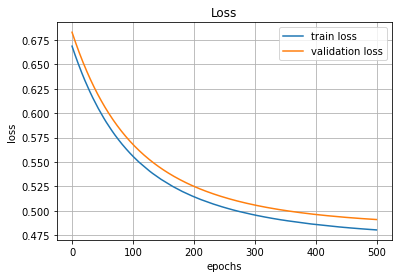

In [12]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

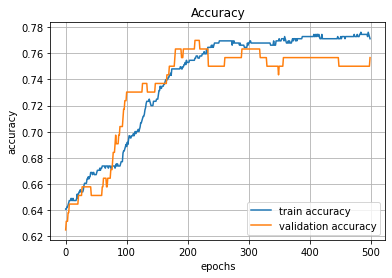

In [13]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [16]:
print(model.input)
print(model.output)
print(model.weights)

Tensor("dense_input:0", shape=(None, 8), dtype=float32)
Tensor("dense/Sigmoid:0", shape=(None, 1), dtype=float32)
[<tf.Variable 'dense/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.858038  ],
       [-2.5527372 ],
       [ 0.16706769],
       [-0.949527  ],
       [-0.2242785 ],
       [-1.4539012 ],
       [-0.9379059 ],
       [-0.03679379]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.06387035], dtype=float32)>]


In [45]:
label_list = [int(label) for label in t_data]
prediction_list = [int(np.round(prediction)) for prediction in model.predict(x_data)]

print(label_list)
print(prediction_list)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 

0